

# Project: Investigate the 'Soccer Database' Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Key notes**: 

> "This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive, and stored in a SQLite database". 

> **Questions to explore**: 
> ><ul>
><li><a href="#q1"> 1. What are the top 10 home team in terms of integral over time?</a></li>
><li><a href="#q2"> 2. What are the top 10 away team in terms of integral over time?</a></li> 
><li><a href="#q3"> 3. What is the top 10 team points over time or in another term which 10 teams improved the most over the time period?</a></li>
><li><a href="#q4"> 4. Best performance of home team in terms of win ratio by Season?</a></li> 
><li><a href="#q5"> 5. Best performance of away team in terms of win ratio by Season?</a></li>
><li><a href="#q6"> 6. What is the disstribution of goal difference of home team and away team, respectively?</a></li>
><li><a href="#q7"> 7. What team attributes lead to the most home_team victories?</a></li>
><li><a href="#q8"> 8. Which players had the most penalties?</a></li>
><li><a href="#q9"> 9. What is the relationship of vision and free_kick_accuracy?</a></li>
><li><a href="#q10"> 10. What is the relationship of sprint_speed and acceleration?</a></li>





### Code used to generate CSV file for match in Mysql


with t1 as (select c.name country_name, l.name league_name, 
          m.id match_id, m.date, m.season, m.stage,                           
          m.home_team_goal, m.away_team_goal,
          t1.defencepressure, t1.defencepressureclass,
          t1.defenceaggression, t1.defenceaggressionclass,
          t1.defenceteamwidth,  t1.defenceteamwidthclass,
          t.team_short_name home_team_abbr, t.team_long_name home_team

          from 
          country c
          join league l
          on c.id = l.country_id
          join match m
          on l.id = m.league_id
          join team t
          on m.home_team_api_id = t.team_api_id
          join team_attributes t1
          on t.team_api_id = t1.team_api_id
		  order by m.date desc),


t2 as (select  m.id match_id, t.team_short_name away_team_abbr, t.team_long_name away_team
      from match m
      join team t
      on m.away_team_api_id = t.team_api_id)

select t1.*, t2.away_team_abbr, t2.away_team
        from t1 join t2
        on t1.match_id = t2.match_id

In [1]:
# Set up import statements for all of the packages that are planed to use
# Include a 'magic word' so that visualizations are plotted
# call on dataframe to display the first 5 rows

import pandas as pd
import numpy as np
import datetime
from statistics import mode
% matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('darkgrid')
df = pd.read_csv('European Soccer Database.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Key notes**: In this section of the report, the following work will be done: load the data; check for cleanliness; trim and clean dataset for analysis.

### General Properties

In [2]:
# Load data and print out a few lines

df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,home_team_abbr,home_team,t2.away_team_abbr,t2.away_team
0,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,38,Medium,53,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
1,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
2,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
3,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
4,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich


In [3]:
# return a tuple of the dimensions of the dataframe

df.shape

(142093, 18)

In [4]:
# print the column labels in the dataframe

for i, v in enumerate(df.columns):
    print(i, v)

0 country_name
1 league_name
2 match_id
3 date
4 season
5 stage
6 home_team_goal
7 away_team_goal
8 defencepressure
9 defencepressureclass
10 defenceaggression
11 defenceaggressionclass
12 defenceteamwidth
13 defenceteamwidthclass
14 home_team_abbr
15 home_team
16 t2.away_team_abbr
17 t2.away_team


In [5]:
# check for duplicates in the data

sum(df.duplicated())

26746

In [6]:
#  check if any value is NaN in DataFrame and in how many columns

df.isnull().any().any(), sum(df.isnull().any())

(False, 0)

In [7]:
# displays a concise summary of the dataframe
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142093 entries, 0 to 142092
Data columns (total 18 columns):
country_name              142093 non-null object
league_name               142093 non-null object
match_id                  142093 non-null int64
date                      142093 non-null object
season                    142093 non-null object
stage                     142093 non-null int64
home_team_goal            142093 non-null int64
away_team_goal            142093 non-null int64
defencepressure           142093 non-null int64
defencepressureclass      142093 non-null object
defenceaggression         142093 non-null int64
defenceaggressionclass    142093 non-null object
defenceteamwidth          142093 non-null int64
defenceteamwidthclass     142093 non-null object
home_team_abbr            142093 non-null object
home_team                 142093 non-null object
t2.away_team_abbr         142093 non-null object
t2.away_team              142093 non-null object
dtypes: int64(

In [8]:
# Generates descriptive statistics, excluding NaN values

df.describe()

,match_id,stage,home_team_goal,away_team_goal,defencepressure,defenceaggression,defenceteamwidth
count,142093.000000,142093.000000,142093.000000,142093.000000,142093.000000,142093.000000,142093.000000
mean,12766.872647,18.336554,1.573969,1.138079,46.550935,49.481262,52.312809
std,7488.593456,10.451842,1.308752,1.129731,10.321911,9.950873,9.596944
min,1.000000,1.000000,0.000000,0.000000,23.000000,24.000000,29.000000
25%,6283.000000,9.000000,1.000000,0.000000,39.000000,44.000000,48.000000
50%,12364.000000,18.000000,1.000000,1.000000,46.000000,48.000000,52.000000
75%,19391.000000,27.000000,2.000000,2.000000,53.000000,56.000000,59.000000
max,25979.000000,38.000000,10.000000,9.000000,72.000000,72.000000,73.000000


### Data Cleaning 

In [9]:
# drop duplicates
# confirm correction

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [10]:
# Change column name into lower case for the convenience of analysis
# Confirm changes

df.rename(columns = lambda x: x.lower(), inplace = True)
df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,home_team_abbr,home_team,t2.away_team_abbr,t2.away_team
0,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,38,Medium,53,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
1,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
5,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,60,Medium,60,Press,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
6,Switzerland,Switzerland Super League,25947,2016-05-25 00:00:00,2015/2016,36,2,2,40,Medium,45,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion
7,Switzerland,Switzerland Super League,25947,2016-05-25 00:00:00,2015/2016,36,2,2,48,Medium,47,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion


In [11]:
# Change some column name to avoid confusion
# Confirm changes

df.rename(columns = {'defencepressure': 'defence_pressure', 'defencepressureclass': 'defence_pressure_class',\
                     'defenceaggression': 'defence_aggression','defenceaggressionclass': \
                     'defence_aggression_class', 'defenceteamwidth': 'defenceteam_width', \
                     'defenceteamwidthclass': 'defenceteam_width_class', 't2.away_team_abbr':\
                     'away_team_abbr', 't2.away_team': 'away_team'}, inplace = True)
df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,defence_aggression,defence_aggression_class,defenceteam_width,defenceteam_width_class,home_team_abbr,home_team,away_team_abbr,away_team
0,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,38,Medium,53,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
1,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
5,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,60,Medium,60,Press,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
6,Switzerland,Switzerland Super League,25947,2016-05-25 00:00:00,2015/2016,36,2,2,40,Medium,45,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion
7,Switzerland,Switzerland Super League,25947,2016-05-25 00:00:00,2015/2016,36,2,2,48,Medium,47,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion


In [12]:
# Fix datetime format
# Confirm changes

df.date = df.date.apply(pd.to_datetime, errors='coerce')
df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,defence_aggression,defence_aggression_class,defenceteam_width,defenceteam_width_class,home_team_abbr,home_team,away_team_abbr,away_team
0,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,38,Medium,53,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
1,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
5,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,60,Medium,60,Press,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
6,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,40,Medium,45,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion
7,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,48,Medium,47,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion


In [13]:
# Add goals difference for home_team
# Confirm changes

home_diff = df.home_team_goal - df.away_team_goal
df['home_diff'] = home_diff 
df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,defence_aggression,defence_aggression_class,defenceteam_width,defenceteam_width_class,home_team_abbr,home_team,away_team_abbr,away_team,home_diff
0,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,38,Medium,53,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1
1,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1
5,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,60,Medium,60,Press,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1
6,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,40,Medium,45,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0
7,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,48,Medium,47,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0


In [14]:
# Add wins, draws, losses data for home team
# Confirm changes

home_wdl = []

for g in df.home_diff.tolist():
    if g > 0:
        home_wdl.append('w')
    elif g == 0:
        home_wdl.append('d')
    else:
        home_wdl.append('l')

df['home_wdl'] = np.array(home_wdl)

df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,defence_aggression,defence_aggression_class,defenceteam_width,defenceteam_width_class,home_team_abbr,home_team,away_team_abbr,away_team,home_diff,home_wdl
0,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,38,Medium,53,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l
1,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l
5,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,60,Medium,60,Press,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l
6,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,40,Medium,45,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,d
7,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,48,Medium,47,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,d


In [15]:
# Add goals difference for away team
# Confirm changes

away_diff = df.away_team_goal - df.home_team_goal
df['away_diff'] = away_diff 
df.head()



,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,...,defence_aggression_class,defenceteam_width,defenceteam_width_class,home_team_abbr,home_team,away_team_abbr,away_team,home_diff,home_wdl,away_diff
0,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,38,Medium,...,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l,1
1,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,47,Medium,...,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l,1
5,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,60,Medium,...,Press,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l,1
6,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,40,Medium,...,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,d,0
7,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,48,Medium,...,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,d,0


In [16]:
# Add wins, draws, losses data for away team
# Confirm changes

away_wdl = []

for g in df.away_diff.tolist():
    if g > 0:
        away_wdl.append('w')
    elif g == 0:
        away_wdl.append('d')
    else:
        away_wdl.append('l')

df['away_wdl'] = np.array(away_wdl)

df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,...,defenceteam_width,defenceteam_width_class,home_team_abbr,home_team,away_team_abbr,away_team,home_diff,home_wdl,away_diff,away_wdl
0,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,38,Medium,...,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l,1,w
1,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,47,Medium,...,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l,1,w
5,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,60,Medium,...,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,l,1,w
6,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,40,Medium,...,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,d,0,d
7,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,48,Medium,...,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,d,0,d


In [17]:
# add score for home team, win = 3, draw = 1, lose = 0

home_score = []

for wdl in df.home_wdl:
    if wdl == 'w':
        home_score.append(3)
    elif wdl == 'd':
        home_score.append(1)
    else: 
        home_score.append(0)
        
df['home_score'] = np.array(home_score)

In [18]:
# add score for away team, win = 3, draw = 1, lose = 0

away_score = []

for wdl in df.away_wdl:
    if wdl == 'w':
        away_score.append(3)
    elif wdl == 'd':
        away_score.append(1)
    else: 
        away_score.append(0)
        
df['away_score'] = np.array(away_score)

In [19]:
# add win, draw and lose for home team, win = 1, draw = 0, lose = 0

home_win = []

for wdl in df.home_wdl:
    if wdl == 'w':
        home_win.append(1)
    elif wdl == 'd':
        home_win.append(0)
    else: 
        home_win.append(0)
        
df['home_win'] = np.array(home_win)

In [20]:
# add win, draw and lose for home team, draw = 0, lose = 0

away_win = []

for wdl in df.away_wdl:
    if wdl == 'w':
        away_win.append(1)
    elif wdl == 'd':
        away_win.append(0)
    else: 
        away_win.append(0)
        
df['away_win'] = np.array(away_win)

In [21]:
# return a tuple of the dimensions of the dataframe

df.shape

(115347, 26)

<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'></a>
### Research Question 1: What are the top 10 home team in terms of integral over time?

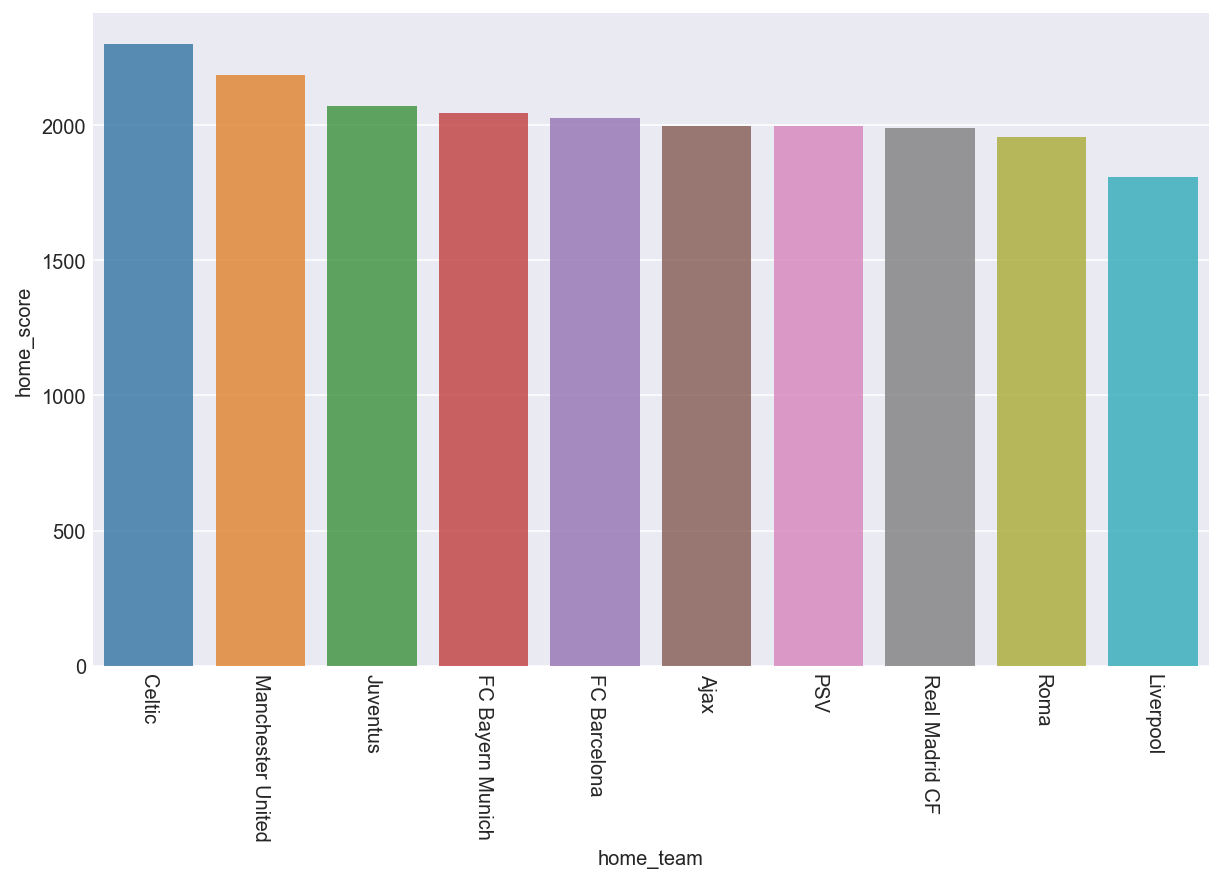

In [22]:
# Groupby of home team and home team integral

home_team_score = df.groupby(['home_team'])['home_score'].sum()

# Find the top 10

home_team_score_10 = home_team_score.nlargest(n = 10)

# Plot

plt.subplots(figsize=(10,6))

plt.xticks(rotation=-90)

sns.barplot(home_team_score_10.index, home_team_score_10, alpha=0.8);
 






> According to histogram above is the top 10 home team in terms of integral, with Celtic be the best over time.

<a id='q2'></a>
### Research Question 2: What are the top 10 away team in terms of integral over time?

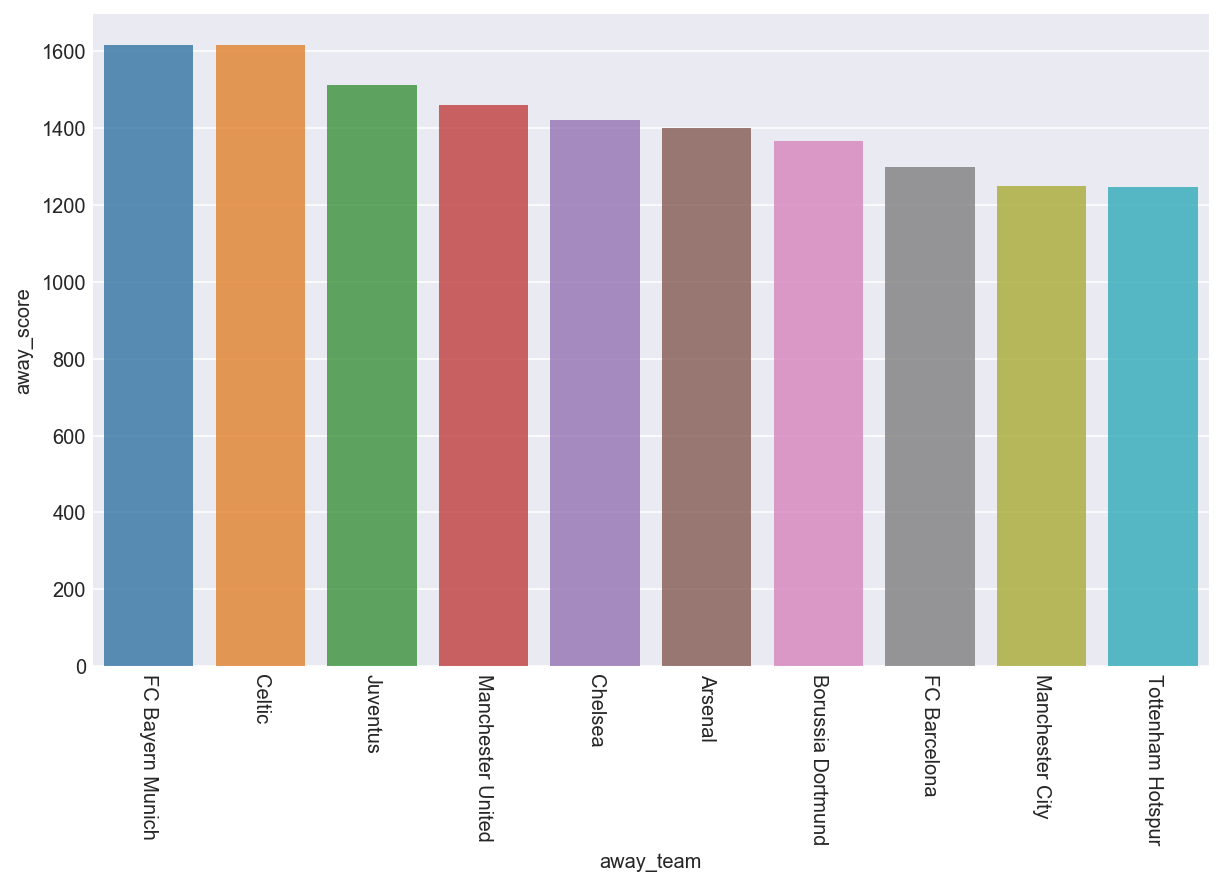

In [23]:
# Groupby of home team and home team accumulated score

away_team_score = df.groupby(['away_team'])['away_score'].sum()

# Find the top 10

away_team_score_10 = away_team_score.nlargest(n = 10)

# Plot

plt.subplots(figsize=(10,6))

plt.xticks(rotation=-90)

sns.barplot(away_team_score_10.index, away_team_score_10, alpha=0.8);

> According to histogram above is the top 10 away team in terms of integral, with FC Bayern Munich be the best over time.

<a id='q3'></a>
### Research Question 3: What is the top 10 team points over time or in another term which 10 teams improved the most over the time period?

In [24]:
 home_team_score.index 

Index(['1. FC Kaiserslautern', '1. FC Köln', '1. FC Nürnberg',
       '1. FSV Mainz 05', 'AC Ajaccio', 'AC Arles-Avignon', 'AC Bellinzona',
       'ADO Den Haag', 'AJ Auxerre', 'AS Monaco',
       ...
       'Widzew Łódź', 'Wigan Athletic', 'Willem II', 'Wisła Kraków',
       'Wolverhampton Wanderers', 'Xerez Club Deportivo', 'Zagłębie Lubin',
       'Zawisza Bydgoszcz', 'Évian Thonon Gaillard FC', 'Śląsk Wrocław'],
      dtype='object', name='home_team', length=285)

In [25]:
away_team_score.index

Index(['1. FC Kaiserslautern', '1. FC Köln', '1. FC Nürnberg',
       '1. FSV Mainz 05', 'AC Ajaccio', 'AC Arles-Avignon', 'AC Bellinzona',
       'ADO Den Haag', 'AJ Auxerre', 'AS Monaco',
       ...
       'Widzew Łódź', 'Wigan Athletic', 'Willem II', 'Wisła Kraków',
       'Wolverhampton Wanderers', 'Xerez Club Deportivo', 'Zagłębie Lubin',
       'Zawisza Bydgoszcz', 'Évian Thonon Gaillard FC', 'Śląsk Wrocław'],
      dtype='object', name='away_team', length=296)

In [26]:
# Check index difference 
# away_team_score.index - home_team_score.index

ind_diff = away_team_score.index.difference(home_team_score.index)
diff = pd.Series(index = ind_diff)

In [27]:
#home_team_score.fillna(0, inplace=True)

home_team_score.append(diff).head()

1. FC Kaiserslautern     210.0
1. FC Köln               635.0
1. FC Nürnberg           666.0
1. FSV Mainz 05         1164.0
AC Ajaccio               201.0
dtype: float64

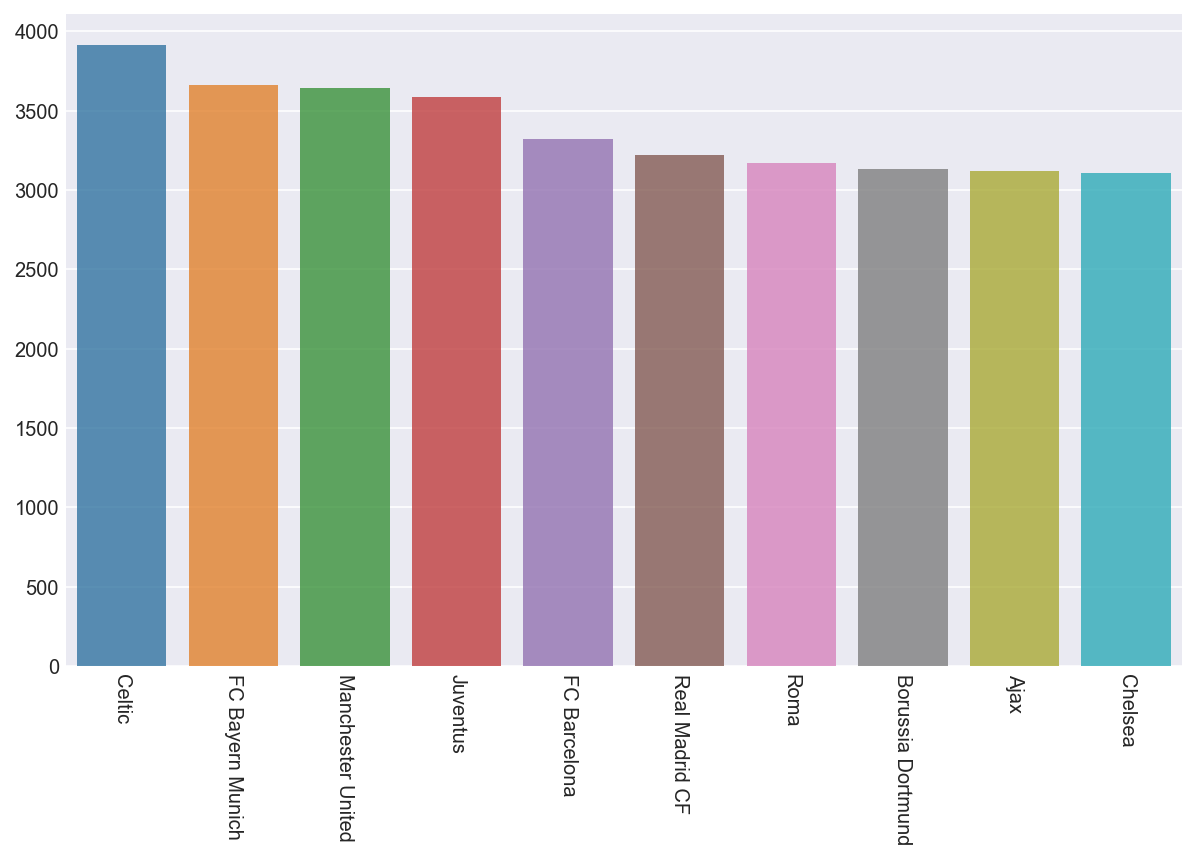

In [28]:
# total score 
    
team_total_score =    away_team_score + home_team_score
    
# Find the top 10

team_total_score_10 = team_total_score.nlargest(n = 10)

# Plot

plt.subplots(figsize=(10,6))

plt.xticks(rotation=-90)

sns.barplot(team_total_score_10.index, team_total_score_10, alpha=0.8);

In [29]:
# matchscore2 = pd.ExcelWriter('matchscore2.xlsx', engine='xlsxwriter')
# away_team_score.to_excel(matchscore2,'Sheet1')
# home_team_score.to_excel(matchscore2,'Sheet2')
# team_total_score.to_excel(matchscore2,'Sheet3')
# matchscore2.save()

<a id='q4'></a>
### Research Question 4: Best performance of home team in terms of win ratio by Season?

In [30]:
# Convert w,d,l into numbers as 1, 0, 0

df1 = df.copy()

df1['home_wdl'].replace(['w'], 1, inplace = True)
df1['home_wdl'].replace(['l', 'd'], 0, inplace = True)

# Calculate win ratio home team 

home_win_ratio = df1.groupby(['season', 'home_team'])['home_wdl'].sum()\
/df1.groupby(['season', 'home_team'])['home_wdl'].count()


In [31]:
# Creating a new dataframe and fill respective coulumns with season, home_team, win_ratio accordingly

home_win_ratio.index.levels[0]
topteam1 = pd.DataFrame(columns=['season','home_team','win_ratio'])
season1=[]
home_team1=[]
win_ratio1=[]

for ind in home_win_ratio.index.levels[0]:
    for i in range(0,1):
        season1.append(ind)
        home_team1.append(home_win_ratio.loc[ind].sort_values(ascending=False).index[i])
        win_ratio1.append(home_win_ratio.loc[ind].sort_values(ascending=False).values[i])

topteam1['season'] = season1                    
topteam1['home_team'] = home_team1
topteam1['win_ratio'] = win_ratio1                    


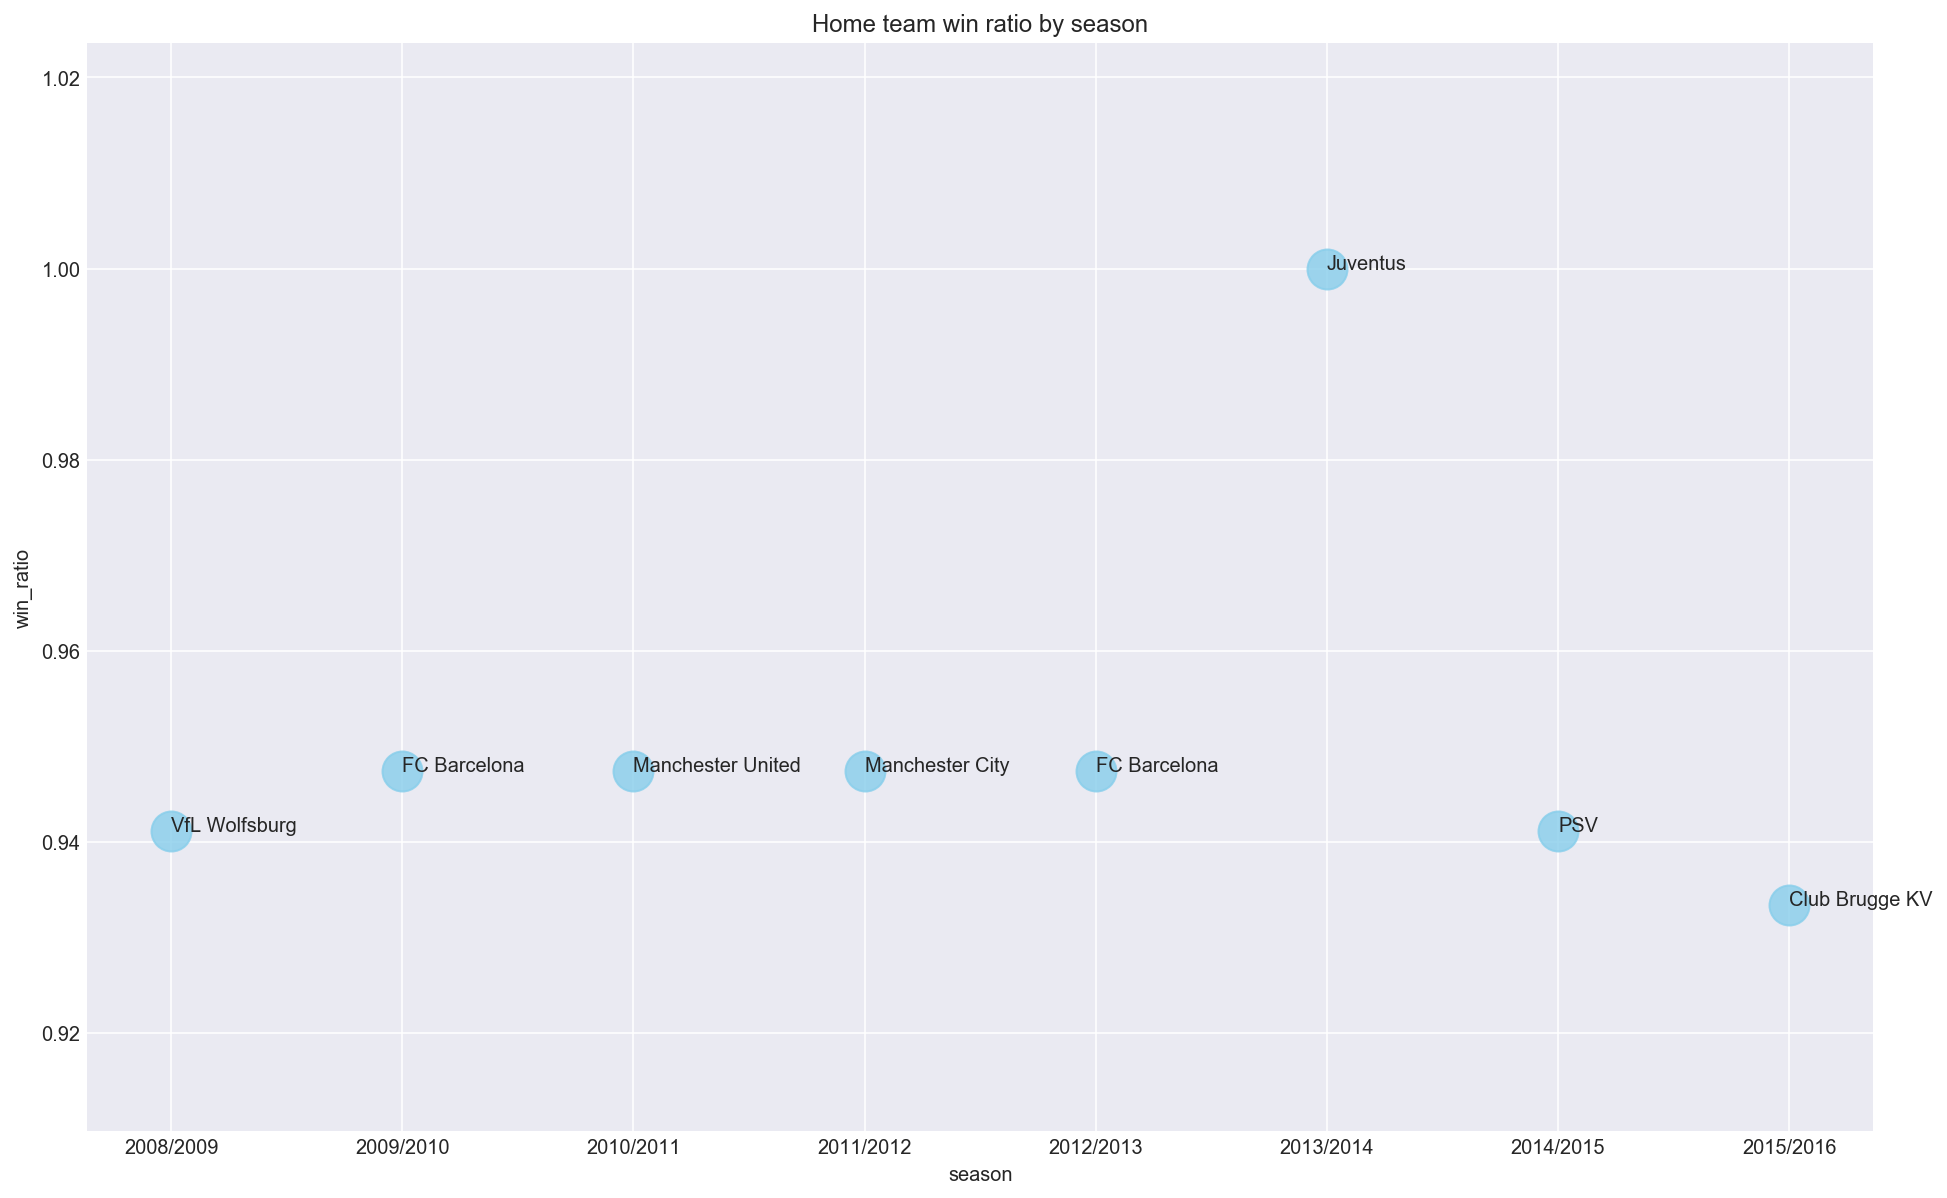

In [32]:

plt.figure(figsize=(16,10))
p1=sns.regplot(data=topteam1, x="season", y="win_ratio", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})



plt.title('Home team win ratio by season')
# Set x-axis label
plt.xlabel('season')
# Set y-axis label
plt.ylabel('win_ratio')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        

label_point(topteam1.season, topteam1.win_ratio,topteam1.home_team, plt.gca())



<a id='q5'></a>
### Research Question 5: Best performance of away team in terms of win ratio by Season?

In [33]:
# Same steps as for home team 



df1['away_wdl'].replace(['w'], 1, inplace = True)
df1['away_wdl'].replace(['l', 'd'], 0, inplace = True)

# Calculate win ratio home team 

away_win_ratio = df1.groupby(['season', 'away_team'])['away_wdl'].sum()\
/df1.groupby(['season', 'away_team'])['away_wdl'].count()

In [34]:
# Creating a new dataframe and fill respective coulumns with season, home_team, win_ratio accordingly

away_win_ratio.index.levels[0]
away_topteam1 = pd.DataFrame(columns=['season','home_team','win_ratio'])
away_season1=[]
away_team1=[]
away_win_ratio1=[]

for ind in away_win_ratio.index.levels[0]:
    for i in range(0,1):
        away_season1.append(ind)
        away_team1.append(away_win_ratio.loc[ind].sort_values(ascending=False).index[i])
        away_win_ratio1.append(away_win_ratio.loc[ind].sort_values(ascending=False).values[i])

away_topteam1['season'] = away_season1                    
away_topteam1['away_team'] = away_team1
away_topteam1['win_ratio'] = away_win_ratio1  

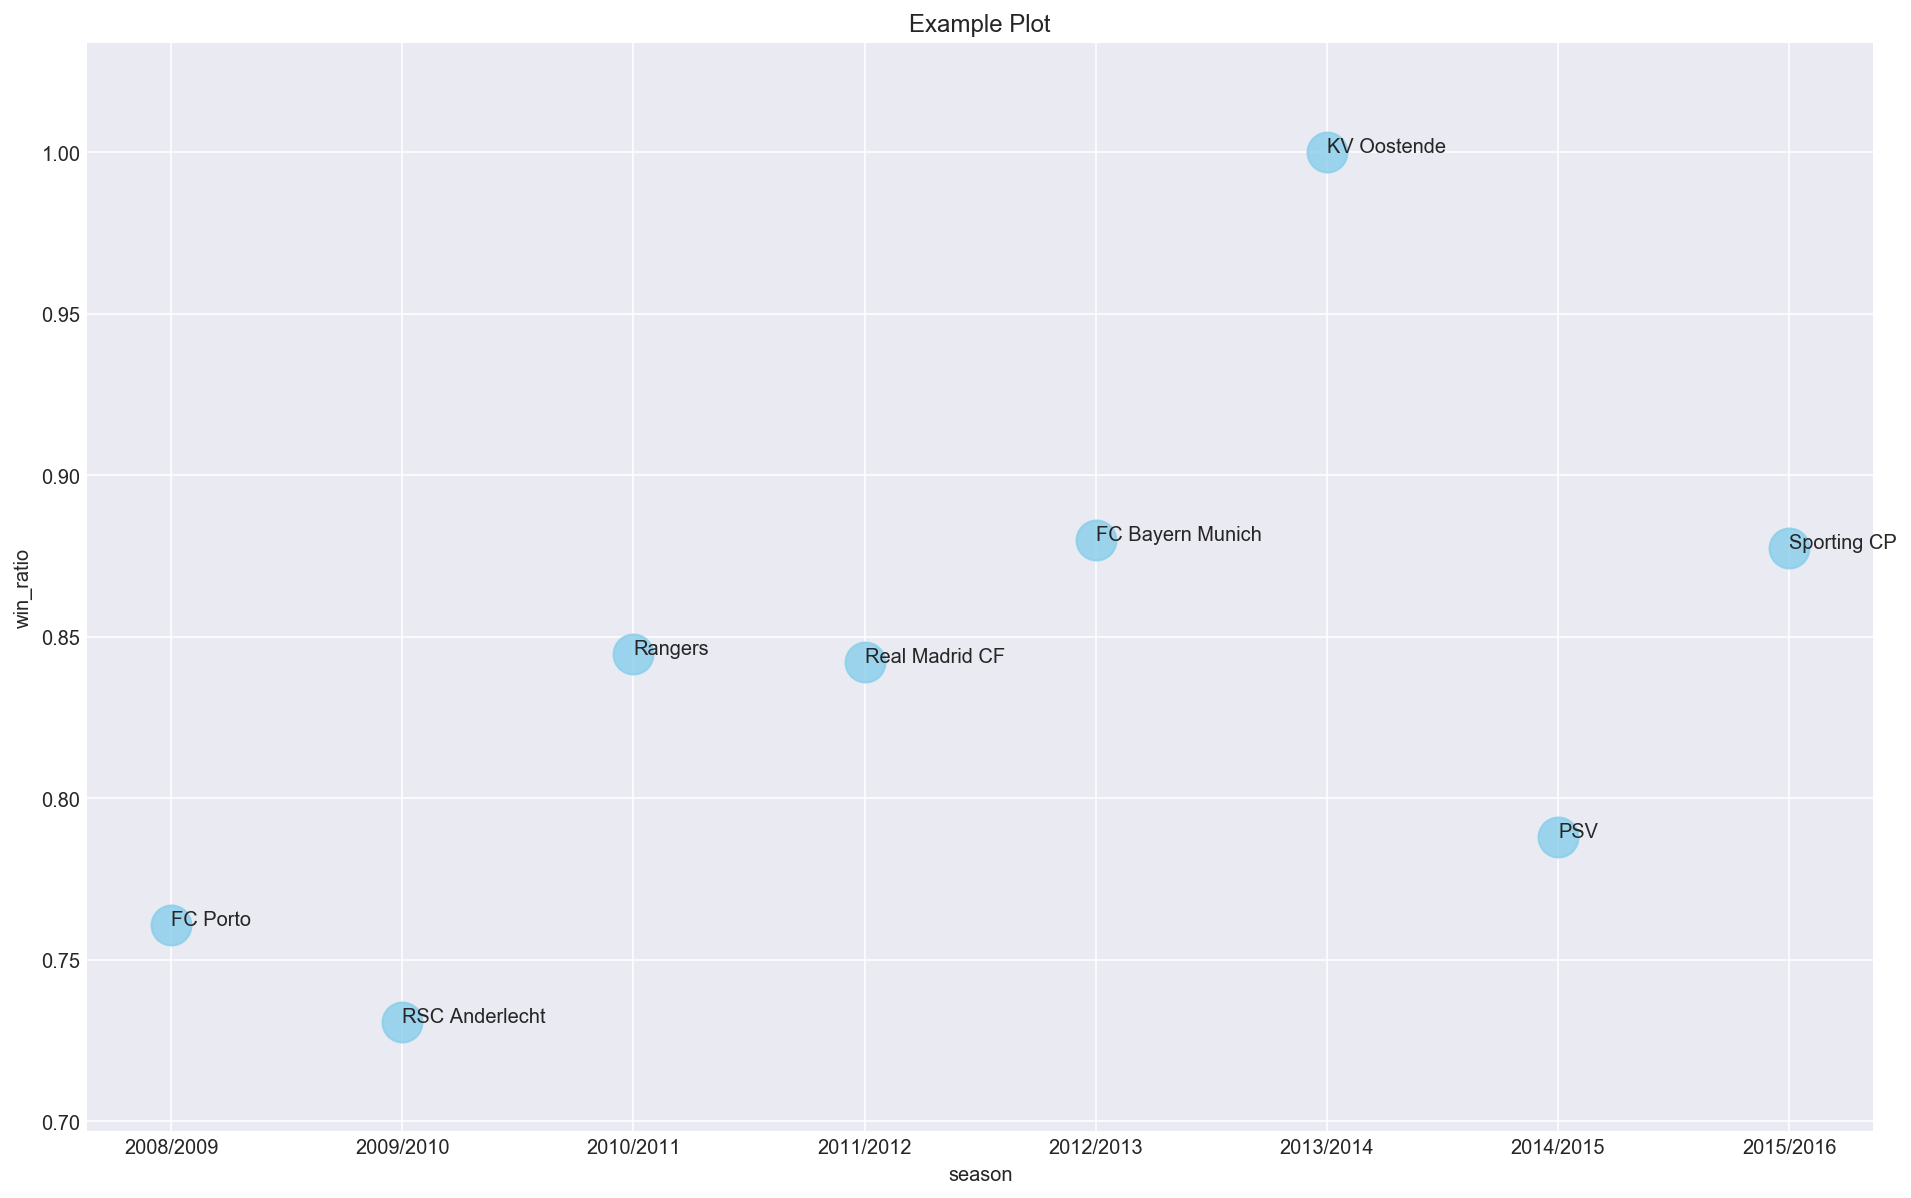

In [35]:

plt.figure(figsize=(16,10))
p1=sns.regplot(data=away_topteam1, x="season", y="win_ratio", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})



plt.title('Example Plot')
# Set x-axis label
plt.xlabel('season')
# Set y-axis label
plt.ylabel('win_ratio')

def label_point1(x, y, val, ax):
    b = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in b.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        

label_point1(away_topteam1.season, away_topteam1.win_ratio,away_topteam1.away_team, plt.gca())

<a id='q6'></a>
### Research Question 6: What is the disstribution of goal difference of home team and away team, respectively?

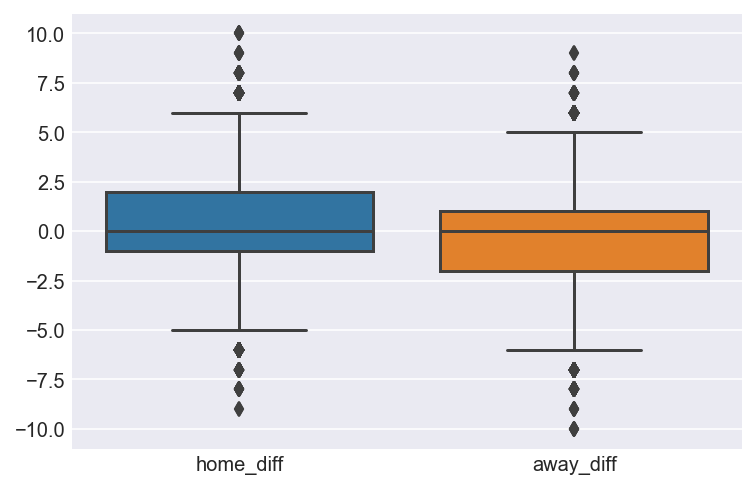

In [36]:
# boxplot

sns.boxplot(data=df.loc[:,'home_diff':'away_diff']);

<a id='q7'></a>
### Research Question 7: What team attributes lead to the most home_team victories?

In [37]:
df_vct = df.copy()

df_vct.drop(df_vct.columns[np.r_[0:6, 9, 11, 13, 14:24, 25]], axis=1, inplace = True)

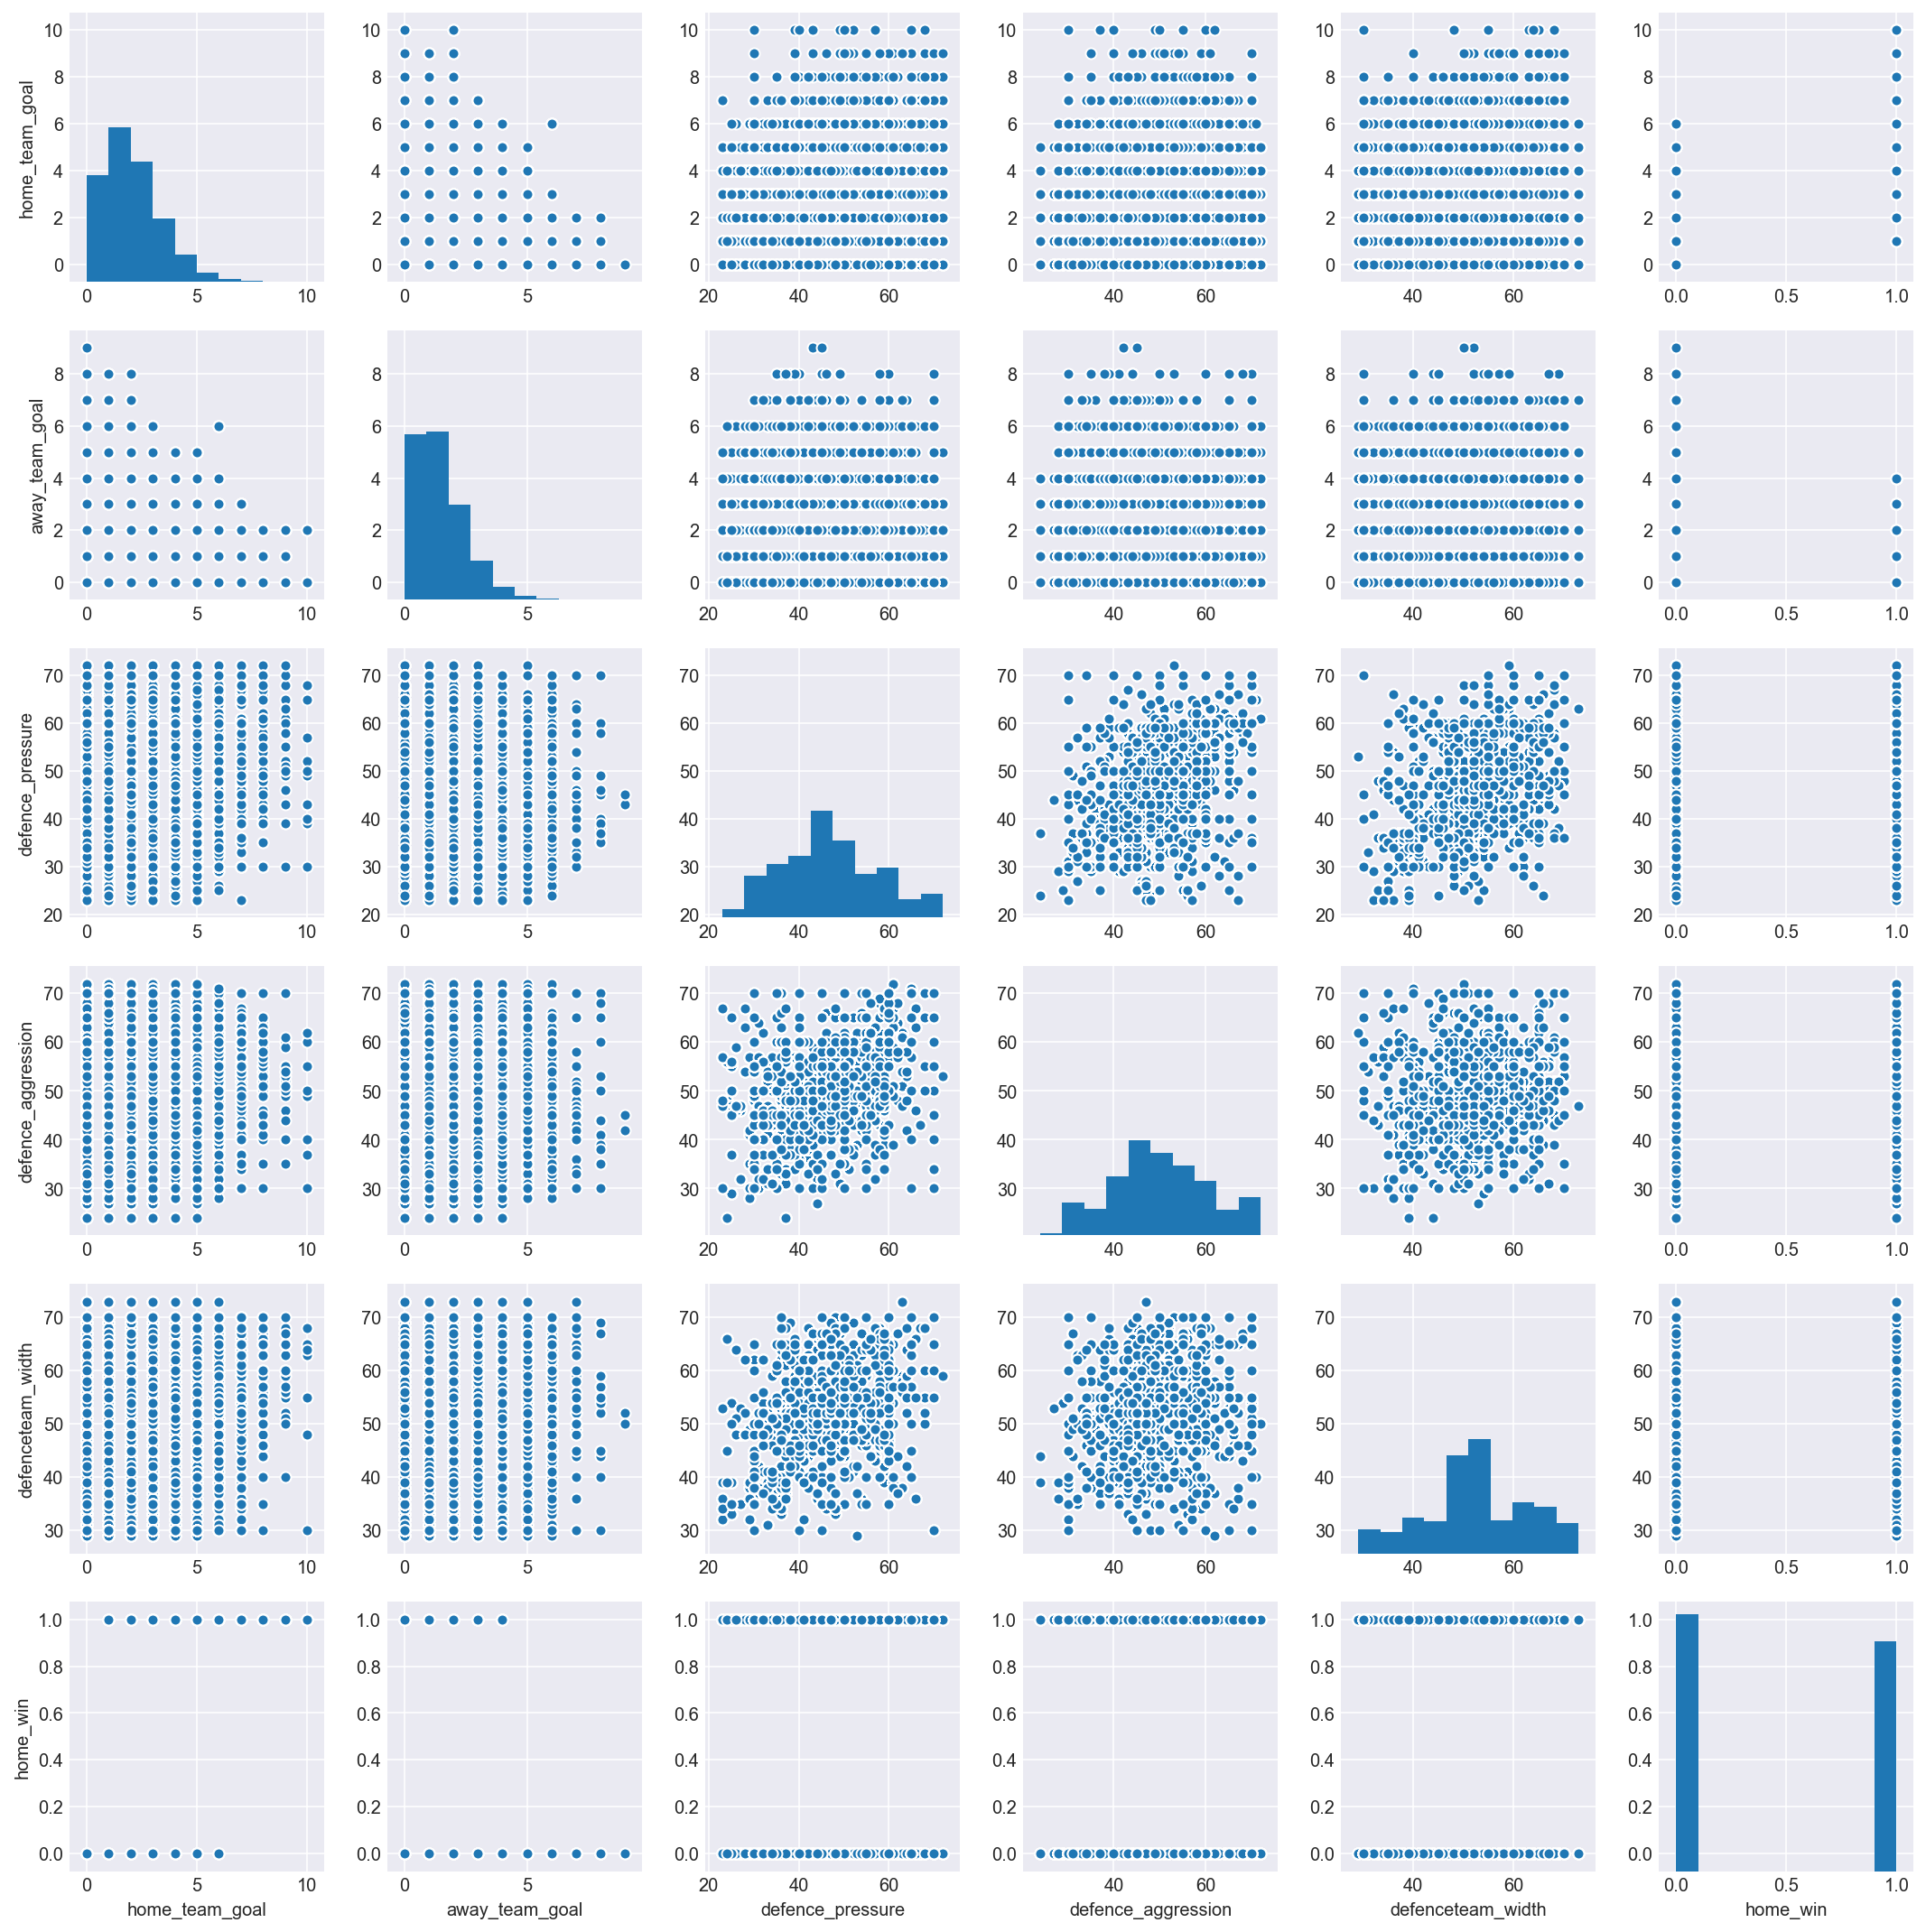

In [38]:
sns.pairplot(df_vct);

> According to the result, home team goal number and away team goal number are positively and negatively correlated with home_team victories, respectively.

### Code used to generte CSV file for player in Mysql 
 
 select player_id, p.player_name,
        p.birthday, p.height, p.weight,
        pa.*

        from player p join player_attributes pa
        ON
        p.player_api_id = pa.player_api_id

<a id='wrangling'></a>
## Data Wrangling

> **Key notes**: In this section of the report, the following work will be done: load the data; check for cleanliness; trim and clean dataset for analysis.

### General Properties

In [39]:
# Load data and print out a few lines

df2 = pd.read_csv('European Soccer Database_Player.csv')

df2.head()

,player_id,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5,218353,505942,2007-02-22 00:00:00,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [40]:
# return a tuple of the dimensions of the dataframe

df2.shape

(183978, 47)

In [41]:
# print the column labels in the dataframe

for i, v in enumerate(df2.columns):
    print(i, v)

0 player_id
1 player_name
2 birthday
3 height
4 weight
5 id
6 player_fifa_api_id
7 player_api_id
8 date
9 overall_rating
10 potential
11 preferred_foot
12 attacking_work_rate
13 defensive_work_rate
14 crossing
15 finishing
16 heading_accuracy
17 short_passing
18 volleys
19 dribbling
20 curve
21 free_kick_accuracy
22 long_passing
23 ball_control
24 acceleration
25 sprint_speed
26 agility
27 reactions
28 balance
29 shot_power
30 jumping
31 stamina
32 strength
33 long_shots
34 aggression
35 interceptions
36 positioning
37 vision
38 penalties
39 marking
40 standing_tackle
41 sliding_tackle
42 gk_diving
43 gk_handling
44 gk_kicking
45 gk_positioning
46 gk_reflexes


In [42]:
# return the datatypes of the columns

df2.dtypes

player_id                int64
player_name             object
birthday                object
height                 float64
weight                   int64
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength

In [43]:
# check for duplicates in the data

sum(df2.duplicated())

0

In [44]:
#  check if any value is NaN in DataFrame and in how many columns

df2.isnull().any().any(), sum(df2.isnull().any())

(True, 38)

In [45]:
# displays a concise summary of the dataframe
# including the number of non-null values in each column

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 47 columns):
player_id              183978 non-null int64
player_name            183978 non-null object
birthday               183978 non-null object
height                 183978 non-null float64
weight                 183978 non-null int64
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling   

In [46]:
# Generates descriptive statistics, excluding NaN values

df2.describe()

,player_id,height,weight,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978.000000,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,5520.197785,181.878872,168.776245,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,3191.425870,6.394818,15.088920,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.000000,157.480000,117.000000,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2754.000000,177.800000,159.000000,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,5532.000000,182.880000,168.000000,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,8256.000000,185.420000,179.000000,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,11075.000000,208.280000,243.000000,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


### Data Cleaning 

In [47]:
# Drop useless columns

df2.drop(['date', 'player_fifa_api_id', 'player_api_id'], axis=1, inplace = True)

# Confirm changes

df2.head()

,player_id,player_name,birthday,height,weight,id,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3,62.0,66.0,right,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [48]:
# Convert string into datatime format in df2

df2.birthday = pd.to_datetime(df2['birthday'], errors='coerce')

In [49]:
# Check which columns contain NaN values

df2.isnull().any()

player_id              False
player_name            False
birthday               False
height                 False
weight                 False
id                     False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision        

In [50]:
# Fill numerical type of NaN values with mean

col = df2.iloc[:, np.r_[6, 7, 11:44]].columns
               
for c in col:
    c_mean = df2[c].mean()
    df2[c].fillna(c_mean, inplace = True)
                  


In [51]:
# Replace the all string type of NaN in df with 'No Record' 

df2.fillna('No record', inplace = True)

# Confirm changes 

df2.isnull().any().any()

False

<a id='eda'></a>
## Exploratory Data Analysis
<a id='q8'></a>
### Research Question 8: Which players had the most penalties?

In [52]:
# Find the index of player who had the most penalties

df2.penalties.idxmax()

149591

In [53]:
# Print out the complete info

df2.iloc[149591]

player_id                             8981
player_name                 Rickie Lambert
birthday               1982-02-16 00:00:00
height                              187.96
weight                                 170
id                                  149592
overall_rating                          75
potential                               75
preferred_foot                       right
attacking_work_rate                   high
defensive_work_rate                 medium
crossing                                67
finishing                               81
heading_accuracy                        84
short_passing                           66
volleys                                 72
dribbling                               65
curve                                   77
free_kick_accuracy                      84
long_passing                            72
ball_control                            75
acceleration                            48
sprint_speed                            46
agility    

> Player 'Rickie Lambert' had the most penalties over time.

<a id='q9'></a>
### Research Question 9: What is the relationship of vision and free_kick_accuracy?

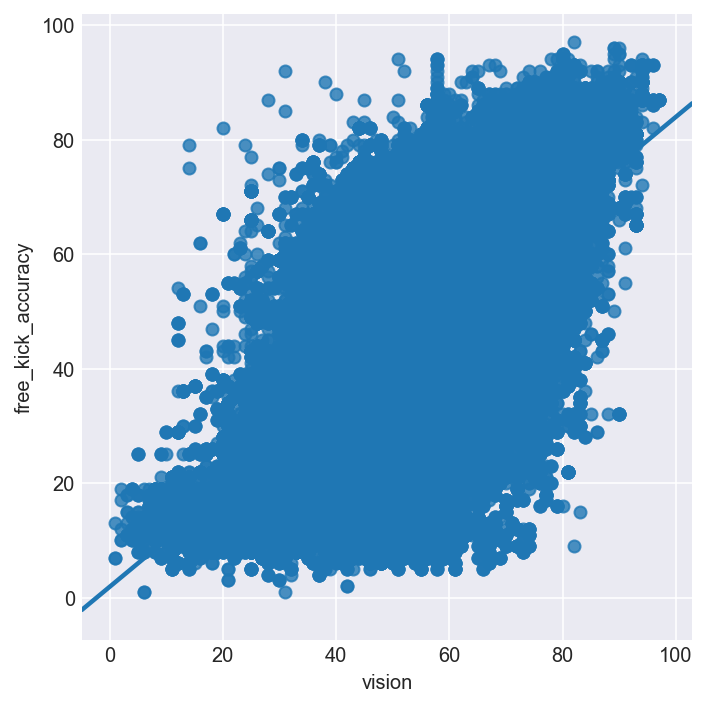

In [54]:
sns.lmplot(x='vision', y='free_kick_accuracy', data=df2);

> The relationship of vision and free_kick_accuracy is positively correlated, The estimated linear regression is shown as the blue line, the estimates varies in the light blue shade with 95% confident level.

<a id='q10'></a>
### Research Question 10: What is the relationship of sprint_speed and acceleration?

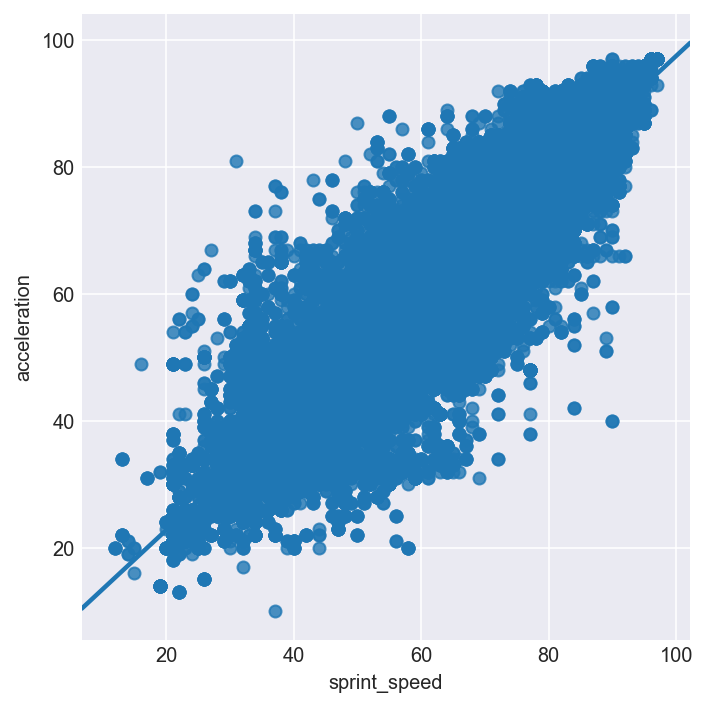

In [55]:
sns.lmplot(x='sprint_speed', y='acceleration', data=df2);

> The relationship of sprint_speed and acceleration is positively correlated, The estimated linear regression is shown as the blue line, the estimates varies in the light blue shade with 95% confident level.

<a id='conclusions'></a>
## Conclusions
> In current study, a good amount of profound analysis has been carried out. Prior to each step, deailed instructions was given and interpretions was also provided afterwards. The two dataset included 115347 and 183978 pieces of european soccer match information ranging from 2008 to 2016, respectively. Based on such substantial data, the analysis would be more reliable as opposed to small scale analysis. 

> The limitations of current study were original data from website hadn't been organized well, as many tables were connected via foreign to foreign key relation. More important, there was no key paired for match and player information. As such, profound analysis was inadmissible, such as player attributes's impact on match.


In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_the_Soccer_Database_Dataset_20180108.ipynb'])

0